## Red Wine Quality Prediction
## C Soma Sekhar
## Batch: DS2307

In [28]:
# Required Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
# Dataset
df = pd.read_csv('winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Data Analysis

In [5]:
#Attributes
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

* No null Values

In [7]:
#Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
df.quality.unique() 

array([5, 6, 7, 4, 8, 3], dtype=int64)

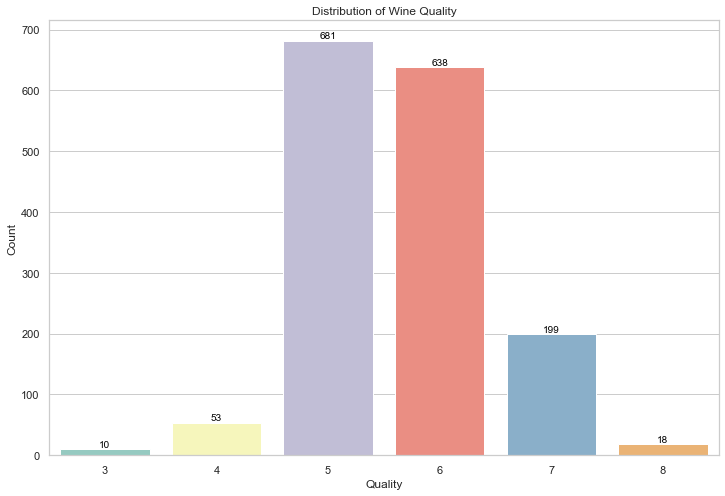

In [9]:
# Create a count plot for wine quality
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
count_plot = sns.countplot(data=df, x="quality", palette="Set3")

# Add count values above each bar
for p in count_plot.patches:
    count_plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.title("Distribution of Wine Quality")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()

### Observations
1.There are no missing/null values in the dataset

2.Two dtypes: float64(11), int64(1)

3.There are six unique values representing the wine quality (imbalanced classes) 5,6 are having high count.
  Instead of having such different values we will binarize it into 1,0 during "Data Preprocesing". 

In [10]:
# Satistical information
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


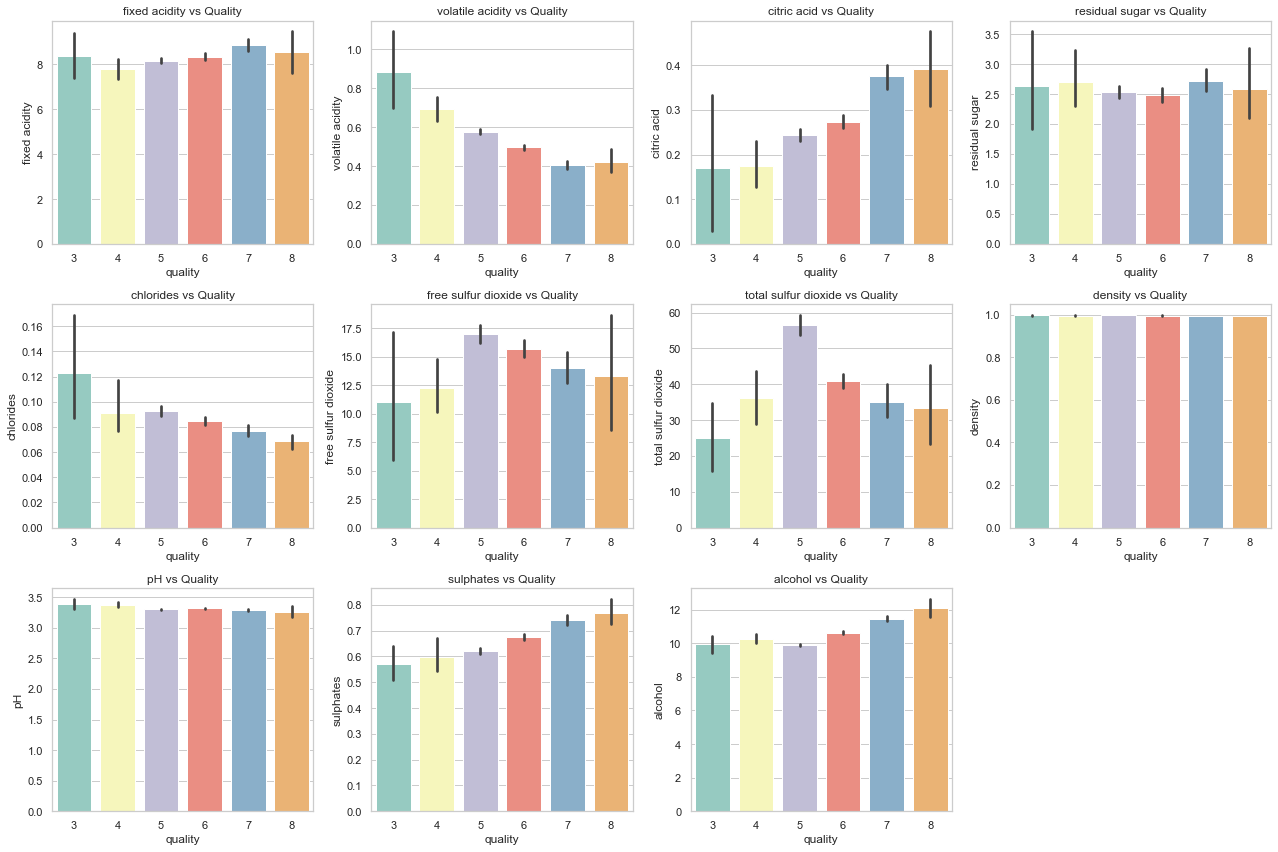

In [11]:
# Define a list of attribute names
attribute_names = df.columns[:-1]  # Exclude the "quality" column

# Set the figure size
plt.figure(figsize=(18, 12))

# Create individual bar plots for each attribute
for i, attribute in enumerate(attribute_names):
    plt.subplot(3, 4, i + 1)  # Create subplots in a 3x4 grid
    sns.barplot(data=df, x="quality", y=attribute, palette="Set3")
    plt.title(f"{attribute} vs Quality")

# Adjust the layout
plt.tight_layout()
plt.show()


 Observing relation between featuers and quality

In [12]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

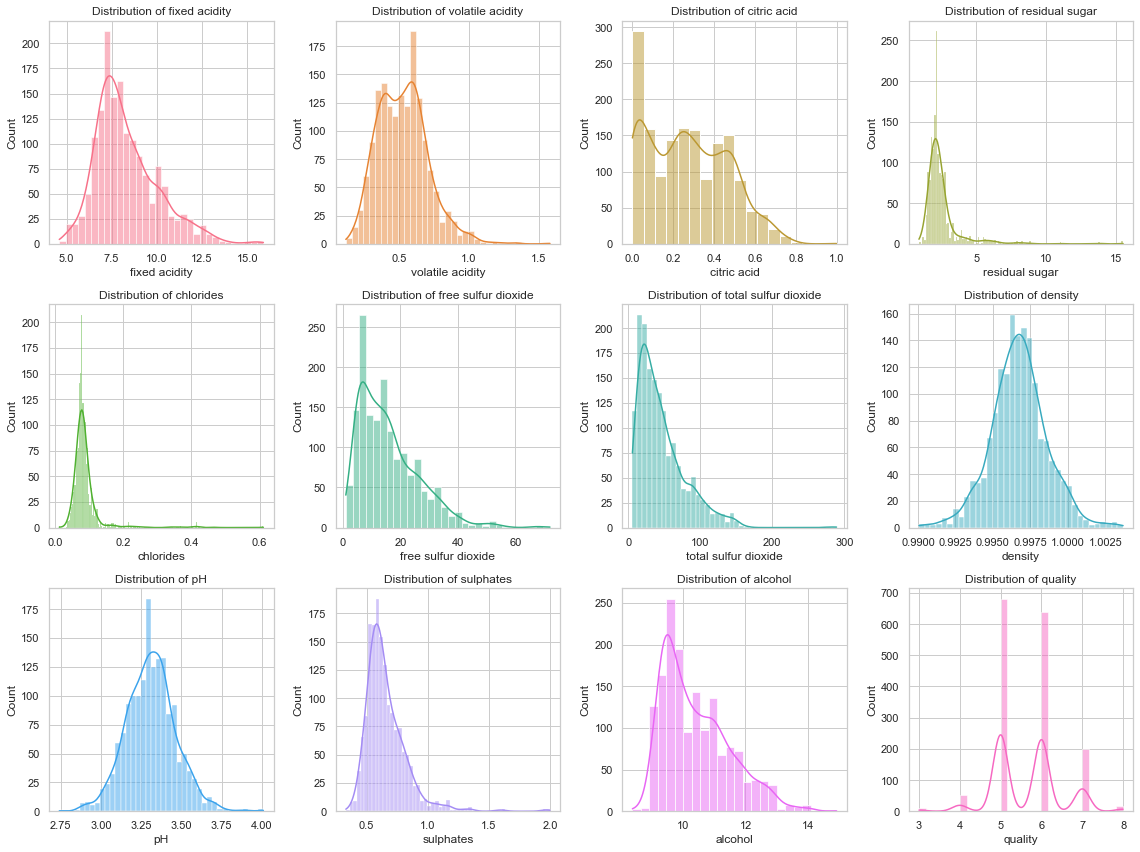

In [13]:
# Creating a custom color palette with 12 colors
custom_palette = sns.color_palette("husl", 12)

# Assigin the number of subplots needed
num_attributes = len(df.columns)
num_rows = (num_attributes - 1) // 4 + 1
num_columns = min(num_attributes, 4)

# Creating subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(16, 12))

# Looping through the data attributes and creating distribution plots
for x, y in enumerate(axes.flat):
    if x < num_attributes:
        sns.histplot(df[df.columns[x]], ax=y, kde=True, color=custom_palette[x])
        y.set_title(f"Distribution of {df.columns[x]}", fontsize=12)

# Adjust the layout
plt.tight_layout()
plt.show()


In [14]:
# The above plots shows the distribution of features. Few are skewed right and some are normally distributed 

## Checking for Outliers
IQR method

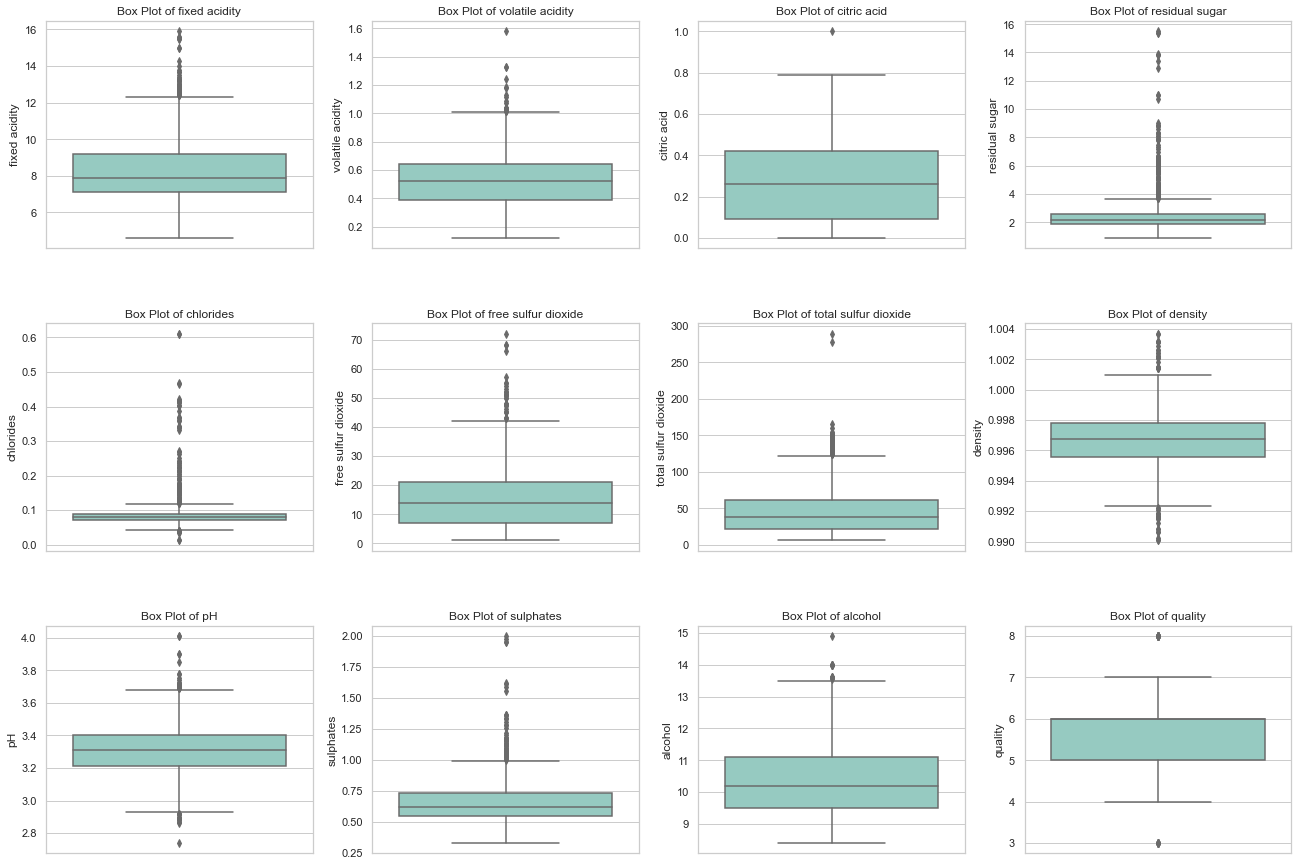

In [15]:
#list of attribute names
attribute_names = df.columns

# figure size
plt.figure(figsize=(18, 12))

# Create individual box plots for each attribute
for i, attribute in enumerate(attribute_names):
    plt.subplot(3, 4, i + 1)  # Create subplots in a 3x4 grid
    sns.boxplot(data=df, y=attribute, palette="Set3")
    plt.title(f"Box Plot of {attribute}")

# Adjust the layout
plt.tight_layout(pad =0.5,w_pad=0.7, h_pad=5.0)
plt.show()

In [16]:
# Calculating to find no.of outliers

# Calculate the first quartile (Q1) and third quartile (Q3) for each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

# Calculate the IQR (Interquartile Range) for each column
IQR = Q3 - Q1

# Define a threshold for identifying outliers (e.g., values outside [Q1 - 1.5*IQR, Q3 + 1.5*IQR])
threshold = 1.5

# Create a boolean DataFrame to identify outliers
outliers = ((df < (Q1 - threshold * IQR)) | (df > (Q3 + threshold * IQR)))

# Create a dictionary to store outlier information for each attribute
outlier_info = {}

# Check for outliers in each attribute
for attribute in df.columns:
    num_outliers = outliers[attribute].sum()
    outlier_info[attribute] = num_outliers

# Print the number of outliers for each attribute
print("Number of Outliers for Each Attribute (IQR Method):")
for attribute, num_outliers in outlier_info.items():
    print(f"{attribute}: {num_outliers}")

Number of Outliers for Each Attribute (IQR Method):
fixed acidity: 49
volatile acidity: 19
citric acid: 1
residual sugar: 155
chlorides: 112
free sulfur dioxide: 30
total sulfur dioxide: 55
density: 45
pH: 35
sulphates: 59
alcohol: 13
quality: 28


### Correlation
Finding the attributes which contributes(/effects) more to quality of wine 

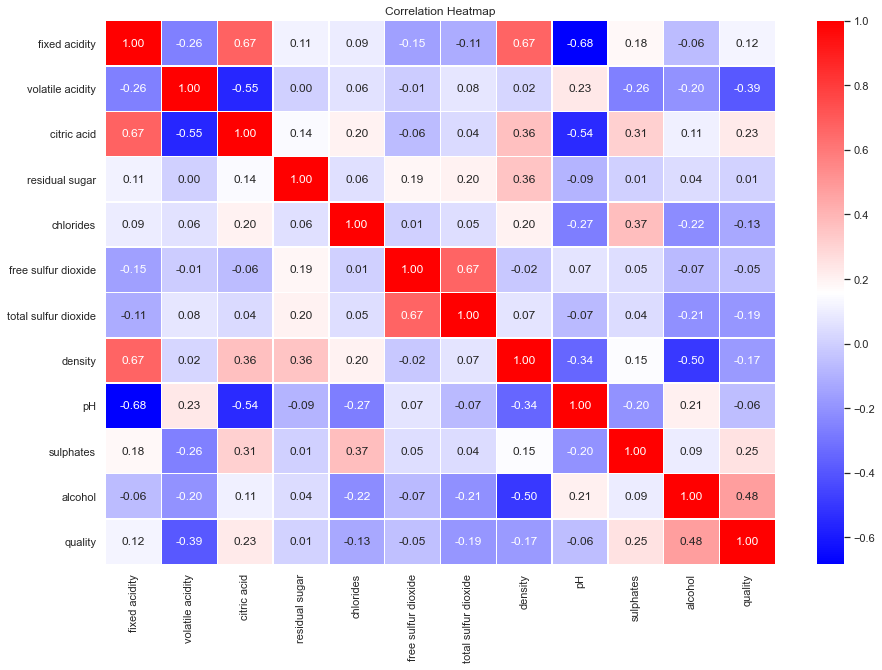

In [17]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='bwr', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()


### Considering the outliers in free sulfur dioxide: 30 & total sulfur dioxide: 55 we shall remove total sulfur dioxide

In [18]:
# Removing total sulfur dioxide
df = df.drop('total sulfur dioxide', axis =1)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,0.99547,3.57,0.71,10.2,5


#### Considering the data loss I have limited the threshold values  to minimal

In [19]:

# Define a dictionary with column names as keys and threshold values as values
thresholds = {
    'sulphates': 1.5,
    'chlorides': 0.5,
    'alcohol': 14,
    'volatile acidity': 1.4,
    'free sulfur dioxide': 60,
    'residual sugar': 10
    
}

# Remove outliers for each column based on threshold
for column, threshold in thresholds.items():
    df = df.drop(df[df[column] > threshold].index)

#Resulting DataFrame
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,0.99547,3.57,0.71,10.2,5


In [20]:
print(df.shape)

(1574, 11)


### Splitting & Labeling featuers

In [21]:
X = df.drop("quality", axis=1)  # X contains all columns except 'quality'
y = df['quality']

## Data Pre-processing

If 
quality >= 7 : 1/good

quality< 7 : 0/not good

In [22]:
# Binarizing the wine quality and also labeling the traget variable

y = df['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)
X = df.drop("quality", axis=1)  # X contains all columns except 'quality'
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1574, dtype: int64

In [23]:
value_counts = y.value_counts()

# Print the counts for each unique value in 'y'
print(value_counts)

0    1357
1     217
Name: quality, dtype: int64


### If we train the model without balancing the data there is a chance that model might learn from class from major data leaving minorty class behind which leads to overfitting 

* So we will try to balance the imbalanced data by over sampling method

### Oversampling

In [24]:
from imblearn.over_sampling import SMOTE
os = SMOTE()

X, y = os.fit_resample(X, y)

In [25]:
y.value_counts()

0    1357
1    1357
Name: quality, dtype: int64

In [26]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,0.997800,3.510000,0.560000,9.400000
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,0.996800,3.200000,0.680000,9.800000
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,0.997000,3.260000,0.650000,9.800000
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,0.998000,3.160000,0.580000,9.800000
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,0.997800,3.510000,0.560000,9.400000
...,...,...,...,...,...,...,...,...,...,...
2709,11.423993,0.570403,0.694799,4.704027,0.109559,6.000000,0.998552,3.089807,0.776795,12.408054
2710,13.325017,0.256900,0.506999,2.266999,0.079690,11.339986,0.999816,3.096800,1.188396,9.601996
2711,8.725744,0.280000,0.406436,1.700000,0.064386,6.564360,0.994281,3.271782,0.632772,12.082180
2712,8.378755,0.258498,0.382564,2.084982,0.043762,4.000000,0.993952,3.273187,0.715311,12.531868


# Model building

In [29]:
# Finding the random state
def find_best_random_state(X, y, model, test_size=0.3, max_random_state=200):
    max_acc = 0
    best_random_state = 0

    for random_state in range(1, max_random_state):
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
        
        model.fit(x_train, y_train)
        predictions = model.predict(x_test)
        
        accuracy = accuracy_score(y_test, predictions)
        
        if accuracy > max_acc:
            max_acc = accuracy
            best_random_state = random_state

    return max_acc, best_random_state


random_forest = RandomForestClassifier()
best_accuracy, best_random_state = find_best_random_state(X, y, random_forest)

print("Best accuracy is", best_accuracy, "at random state", best_random_state)


Best accuracy is 0.9521472392638037 at random state 107


### Train Test split

In [48]:
from sklearn.model_selection import train_test_split

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=107)


In [30]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

def classify(model, X, y, best_random_state=None):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=best_random_state)
    
    # Train the model
    model.fit(x_train, y_train)
    
    # Make predictions for the test set
    y_pred = model.predict(x_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy * 100)
    
      # Cross-validation
    score = cross_val_score(model, X, y, cv=5)
    print("CV Score:", np.mean(score) * 100)
    
    print('Difference b/w Accuracy & Cross Validation score is:', accuracy-np.mean(score))

    
    # Calculate ROC AUC score
    roc_auc = roc_auc_score(y_test, y_pred)
    print("ROC AUC Score:", roc_auc * 100)
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)
    
    # Classification Report
    class_report = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(class_report)
    
  


### Checking out few Classification algorithms

In [31]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy: 88.83435582822085
CV Score: 86.9921782090749
Difference b/w Accuracy & Cross Validation score is: 0.01842177619145957
ROC AUC Score: 88.95367758732912
Confusion Matrix:
[[355  64]
 [ 27 369]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       419
           1       0.85      0.93      0.89       396

    accuracy                           0.89       815
   macro avg       0.89      0.89      0.89       815
weighted avg       0.89      0.89      0.89       815



In [54]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model, X, y)

Accuracy: 92.76073619631902
CV Score: 89.86741690621326
Difference b/w Accuracy & Cross Validation score is: 0.028933192901057447
ROC AUC Score: 92.75696150696152
Confusion Matrix:
[[365  42]
 [ 17 391]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       407
           1       0.90      0.96      0.93       408

    accuracy                           0.93       815
   macro avg       0.93      0.93      0.93       815
weighted avg       0.93      0.93      0.93       815



In [33]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

Accuracy: 83.55828220858895
CV Score: 80.91360692612453
Difference b/w Accuracy & Cross Validation score is: 0.02644675282464426
ROC AUC Score: 83.51995224485367
Confusion Matrix:
[[324  69]
 [ 65 357]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.83       393
           1       0.84      0.85      0.84       422

    accuracy                           0.84       815
   macro avg       0.84      0.84      0.84       815
weighted avg       0.84      0.84      0.84       815



In [34]:
#Support vector machine classifier

from sklearn.svm import SVC
model = SVC()
classify(model, X, y)

Accuracy: 77.66871165644172
CV Score: 77.37599641189783
Difference b/w Accuracy & Cross Validation score is: 0.002927152445438841
ROC AUC Score: 77.6848692380964
Confusion Matrix:
[[308  86]
 [ 96 325]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.78      0.77       394
           1       0.79      0.77      0.78       421

    accuracy                           0.78       815
   macro avg       0.78      0.78      0.78       815
weighted avg       0.78      0.78      0.78       815



In [35]:
#ExtraTreesClassifier

from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
classify(model, X, y)

Accuracy: 94.60122699386503
CV Score: 91.30456055941775
Difference b/w Accuracy & Cross Validation score is: 0.03296666434447282
ROC AUC Score: 94.741791962574
Confusion Matrix:
[[381  40]
 [  4 390]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.90      0.95       421
           1       0.91      0.99      0.95       394

    accuracy                           0.95       815
   macro avg       0.95      0.95      0.95       815
weighted avg       0.95      0.95      0.95       815



In [36]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
classify(model, X, y)

Accuracy: 87.36196319018404
CV Score: 83.6034603439957
Difference b/w Accuracy & Cross Validation score is: 0.037585028461883385
ROC AUC Score: 87.15650377030161
Confusion Matrix:
[[321  63]
 [ 40 391]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.84      0.86       384
           1       0.86      0.91      0.88       431

    accuracy                           0.87       815
   macro avg       0.88      0.87      0.87       815
weighted avg       0.87      0.87      0.87       815



In [37]:
#GradientBoostingClassifier

from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
classify(model, X, y)

Accuracy: 89.69325153374234
CV Score: 86.5885846703771
Difference b/w Accuracy & Cross Validation score is: 0.031046668633652352
ROC AUC Score: 89.53543050749364
Confusion Matrix:
[[334  60]
 [ 24 397]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       394
           1       0.87      0.94      0.90       421

    accuracy                           0.90       815
   macro avg       0.90      0.90      0.90       815
weighted avg       0.90      0.90      0.90       815



## The least value of Difference b/w Accuracy & Cross Validation score is considered as best performing model

### So " Decision Tree Classifier" (0.01842177619145957) is best performing model

## - Hyper Parameter tuning

In [59]:
#DesicionTreeClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
        'criterion':['gini', 'entropy'],
        'min_samples_split': [2, 5, 10, 15],
        'max_depth': [0, 10, 20],    
        'min_samples_leaf': [1, 2, 4, 8],  
        'random_state': [10, 50, 1000]
    }

In [60]:
GCV = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5)
GCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'min_samples_leaf': [1, 2, 4, 8],
                         'min_samples_split': [2, 5, 10, 15],
                         'random_state': [10, 50, 1000]})

In [61]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'random_state': 50}

In [64]:
best_model = DecisionTreeClassifier(criterion = 'gini', max_depth=20 ,min_samples_leaf = 1, min_samples_split = 2, random_state = 1000 )
best_model.fit(X_train,y_train)
pred = best_model.predict(X_test)
accuracy =accuracy_score(y_test,pred)
print(accuracy*100)

90.42944785276073


In [65]:
# Accuracy is better when random_state=1000 : 90.43
# Than when random_state=50 : 89.94

### ROC and AUC ploting  

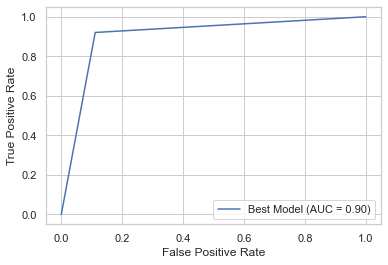

In [76]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import RocCurveDisplay

# Make predictions on the test data
pred = best_model.predict(X_test)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, pred)

# Calculate the ROC AUC
roc_auc = roc_auc_score(y_test, pred)

# Display the ROC curve
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="Best Model")
roc_display.plot()

### AUC =0.90

### Saving the Model as pickel file

In [77]:
import joblib


# Define the filename for the pickle file
model_filename = "best_model_DTC.pkl"

# Save the model to the pickle file
joblib.dump(best_model, model_filename)

print(f"Model saved to {model_filename}")

Model saved to best_model_DTC.pkl


In [80]:
# Load the model from the pickle file
loaded_model = joblib.load("best_model_DTC.pkl")

#Prediction
prediction = model.predict(X_test)
prediction

array([1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,

In [99]:
org = np.array(y_test)
df = pd.DataFrame()
df['Predicted']= prediction
df['Original']= org
df

,Predicted,Original
0,1,1
1,1,1
2,1,1
3,1,1
4,0,0
...,...,...
810,1,1
811,1,1
812,0,0
813,0,0


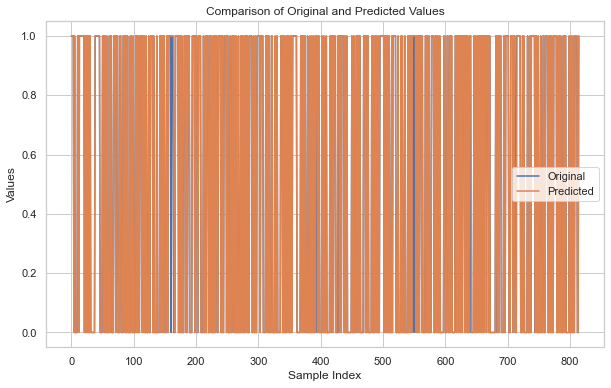

In [100]:
# a line plot to visualize the comparison
plt.figure(figsize=(10, 6))
plt.plot(df['Original'], label='Original')
plt.plot(df['Predicted'], label='Predicted')
plt.legend()
plt.title('Comparison of Original and Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Values')
plt.show()

In [104]:
# Tried many plots But none of them are visual describable might be because  the values are just 0's , 1's